# Decision Tree Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

## Importing the dataset

In [40]:
dataset = pd.read_csv('output.csv')
X = dataset.iloc[:, 2:12].values
y = dataset.iloc[:, 1].values

In [41]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [42]:
X

array([[3.00e+00, 1.50e+00, 1.34e+03, ..., 3.00e+00, 1.34e+03, 0.00e+00],
       [5.00e+00, 2.50e+00, 3.65e+03, ..., 5.00e+00, 3.37e+03, 2.80e+02],
       [3.00e+00, 2.00e+00, 1.93e+03, ..., 4.00e+00, 1.93e+03, 0.00e+00],
       ...,
       [3.00e+00, 2.50e+00, 3.01e+03, ..., 3.00e+00, 3.01e+03, 0.00e+00],
       [4.00e+00, 2.00e+00, 2.09e+03, ..., 3.00e+00, 1.07e+03, 1.02e+03],
       [3.00e+00, 2.50e+00, 1.49e+03, ..., 4.00e+00, 1.49e+03, 0.00e+00]])

## Splitting the dataset into the Training set and Test set

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Decision Tree Regression model on the Training set

In [44]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [45]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[290000. 289000.]
 [395000. 429900.]
 [250275. 129000.]
 ...
 [540000.  83300.]
 [491234. 520000.]
 [378500. 215000.]]


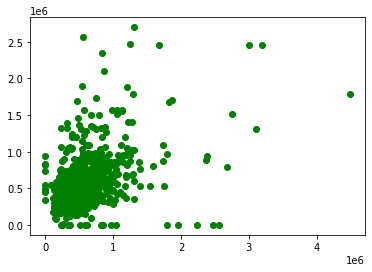

In [46]:
plt.scatter(y_test,y_pred,c='g')

D:\samineh\computer\Anaconda\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

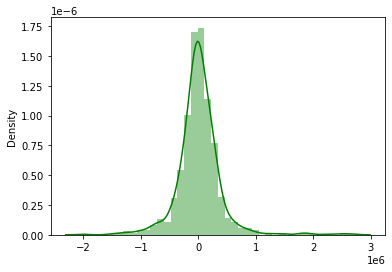

In [47]:
sns.distplot((y_test-y_pred),bins=40,color='g')

## Evaluating the Model Performance

In [48]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(y_test, y_pred)

-0.0035399126752337917

In [49]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 240104.893335825
MSE: 148472147466.40976
RMSE: 385320.83705194265


## Applying k-Fold Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score (estimator= regressor , X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print("r2_score: {:.3f} %".format(r2_score(y_test, y_pred)*100))

Accuracy: -490.24 %
Standard Deviation: 1374.72 %
r2_score: -0.354 %
